# <center> Supervised Learning

## Business Problem

Data Contains Age, Race,Educational details and labour earning for 1974,1975.We need to predict the labours earning for 1978.

### Solution Approach

As we need to predict Labour earning for 1978 which is Continuous in nature,Linear regression can be used for prediction.

### Multiple Linear Regression

Now you Know how to build a model with one X (Feature variable) and Y (Response Variable).But What if you have three features Variables,or may be 10 or 100 ? Building a seperate model for each of them combining them and then understanding them will be a very difficult and next to impossible task.By using multiple linear regression. You can build models between a response variables and many features variables.

Let's see how to do that

## Step 1: Importing Libraries & Understanding Data

Numpy,Pandas,seaborn and matplotlib are imported with aliasesnp,pd,sns andpit respectively.

In [1]:
import pandas as pd

In [2]:
# Importing Labour Training Evalution.csv
import os
os.chdir("C:/Users/sasai/Pandas")
LabourData=pd.read_csv('Linear_Regn_LabourData.csv')
LabourData

Age          Eduacation      Race         Hisp MaritalStatus  Nodeg  \
0       45  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
1       21        Intermediate  NotBlack  NotHispanic    NotMarried      0   
2       38          HighSchool  NotBlack  NotHispanic       Married      0   
3       48  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
4       18  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
...    ...                 ...       ...          ...           ...    ...   
15987   22          HighSchool     black  NotHispanic    NotMarried      0   
15988   20          HighSchool     black  NotHispanic       Married      0   
15989   37          HighSchool  NotBlack  NotHispanic    NotMarried      0   
15990   47  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
15991   40  LessThanHighSchool  NotBlack  NotHispanic    NotMarried      1   

       Earnings_1974  Earnings_1975  Earnings_1978  
0          21516.670      25243.550      25564.670  
1           3175.971       5852.565      13496.080  
2          23039.020      25130.760      25564.670  
3          24994.370      25243.550      25564.670  
4           1669.295      10727.610       9860.869  
...              ...            ...            ...  
15987       3975.352       6801.435       2757.438  
15988       1445.939      11832.240       6895.072  
15989       1733.951       1559.371       4221.865  
15990      16914.350      11384.660      13671.930  
15991      13628.660      13144.550       7979.724  

[15992 rows x 9 columns]

In [3]:
# Looking at the first five rows
LabourData.head()

Age          Eduacation      Race         Hisp MaritalStatus  Nodeg  \
0   45  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
1   21        Intermediate  NotBlack  NotHispanic    NotMarried      0   
2   38          HighSchool  NotBlack  NotHispanic       Married      0   
3   48  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
4   18  LessThanHighSchool  NotBlack  NotHispanic       Married      1   

   Earnings_1974  Earnings_1975  Earnings_1978  
0      21516.670      25243.550      25564.670  
1       3175.971       5852.565      13496.080  
2      23039.020      25130.760      25564.670  
3      24994.370      25243.550      25564.670  
4       1669.295      10727.610       9860.869

In [4]:
# Looking at the last five rows
LabourData.tail()

Age          Eduacation      Race         Hisp MaritalStatus  Nodeg  \
15987   22          HighSchool     black  NotHispanic    NotMarried      0   
15988   20          HighSchool     black  NotHispanic       Married      0   
15989   37          HighSchool  NotBlack  NotHispanic    NotMarried      0   
15990   47  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
15991   40  LessThanHighSchool  NotBlack  NotHispanic    NotMarried      1   

       Earnings_1974  Earnings_1975  Earnings_1978  
15987       3975.352       6801.435       2757.438  
15988       1445.939      11832.240       6895.072  
15989       1733.951       1559.371       4221.865  
15990      16914.350      11384.660      13671.930  
15991      13628.660      13144.550       7979.724

#### Let's Check the data type

In [5]:
# What type of values are stored in the columns?
LabourData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 874.6+ KB


#### Let's Check the summary of Data

In [6]:
# Let's Look at some statistical infromation about our dataframe.
LabourData.describe()

Age         Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
count  15992.000000  15992.000000   15992.000000   15992.000000   15992.000000
mean      33.225238      0.295835   14016.800304   13650.803376   14846.659673
std       11.045216      0.456432    9569.795893    9270.403225    9647.391524
min       16.000000      0.000000       0.000000       0.000000       0.000000
25%       24.000000      0.000000    4403.452250    4398.823000    5669.298000
50%       31.000000      0.000000   15123.580000   14557.110000   16421.975000
75%       42.000000      1.000000   23584.180000   22923.737500   25564.670000
max       55.000000      1.000000   25862.320000   25243.550000   25564.670000

Mean of every EarningS is less than median hence, left skewed.

## Step 2: Visualising Data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

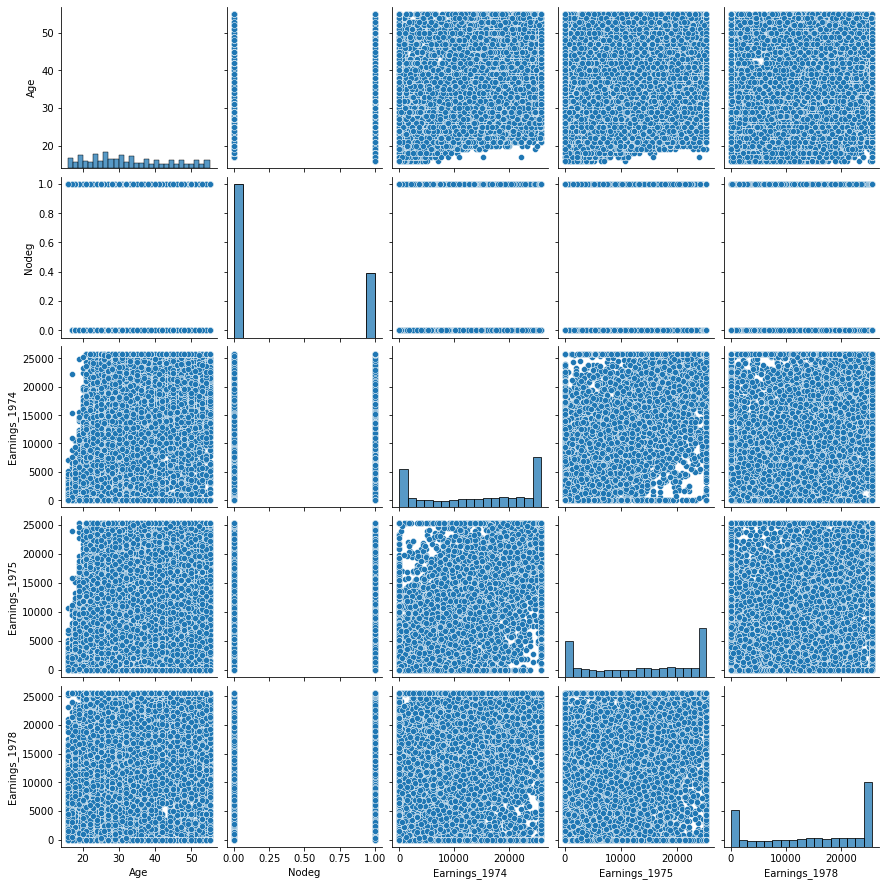

In [8]:
# let's plot a pair plot os all numerical variables in our dataframes
sns.pairplot(LabourData)

C:\Users\sasai\anaconda3.32\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


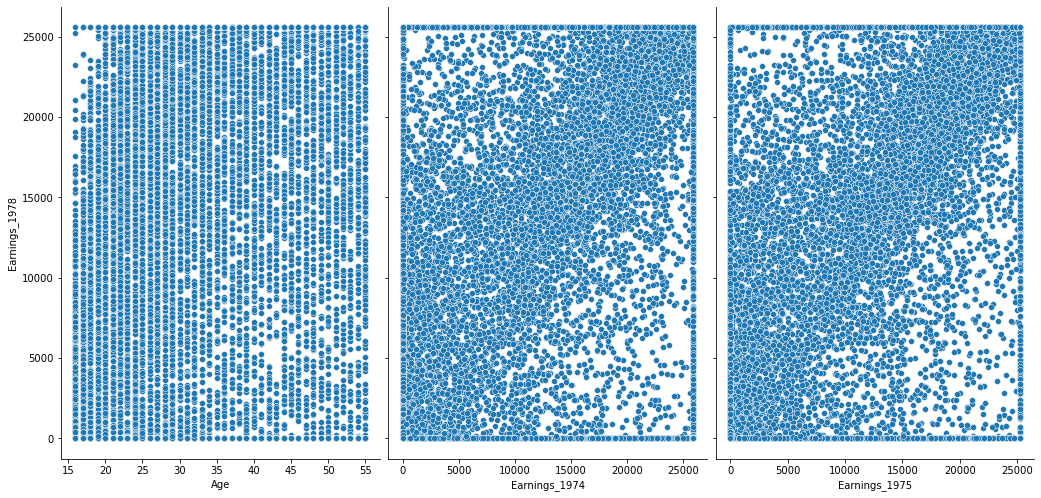

In [9]:
# Visualise the realtionship between the features and the response using scatterplots
sns.pairplot(LabourData, x_vars=['Age','Earnings_1974','Earnings_1975'], y_vars='Earnings_1978', size=7, aspect=0.7, kind='scatter')

##### Note:We use boxplot to see outliers (min & Max) ,Mean, median 

<AxesSubplot:>

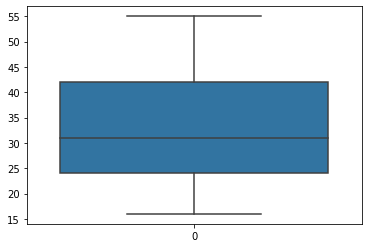

In [10]:
sns.boxplot(data=LabourData["Age"])

<AxesSubplot:>

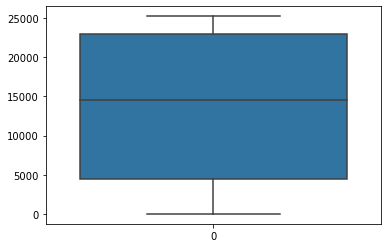

In [11]:
sns.boxplot(data=LabourData["Earnings_1975"])

<AxesSubplot:>

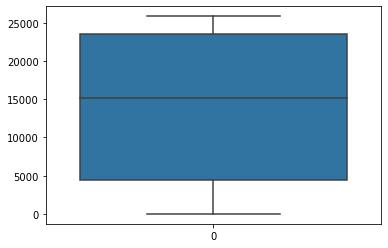

In [12]:
sns.boxplot(data=LabourData["Earnings_1974"])

<AxesSubplot:>

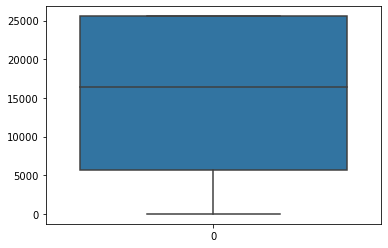

In [13]:
sns.boxplot(data=LabourData["Earnings_1978"])

<AxesSubplot:>

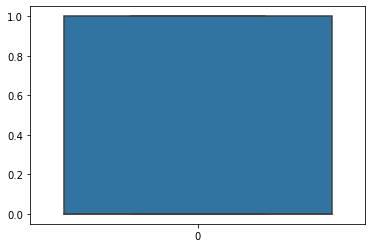

In [14]:
sns.boxplot(data=LabourData["Nodeg"])

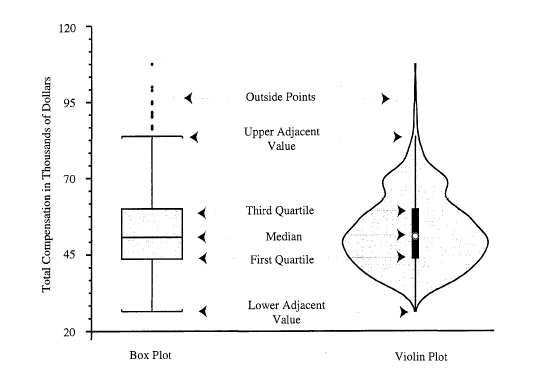

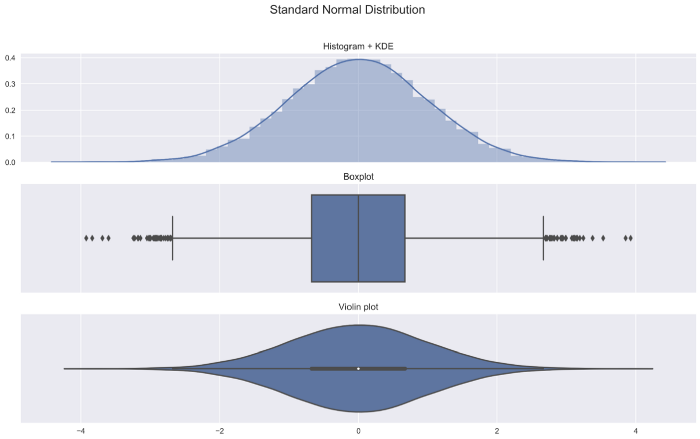

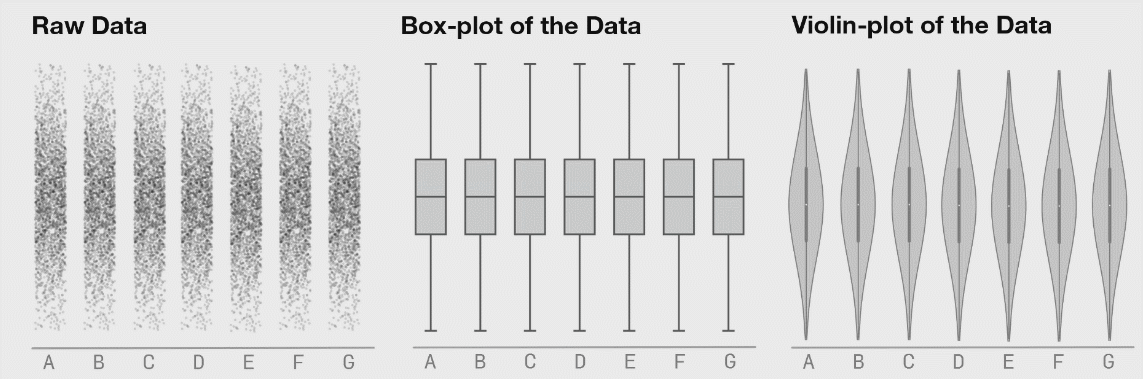

### Exploration of Categorical Variables

<AxesSubplot:xlabel='Race', ylabel='Earnings_1978'>

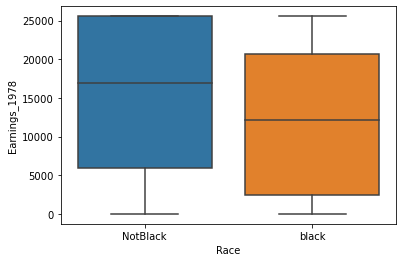

In [15]:
sns.boxplot(x=LabourData["Race"],y=LabourData["Earnings_1978"])

##### Note: Median Earning for NonBlack is higher than Black Loabours

<AxesSubplot:xlabel='Race', ylabel='Earnings_1978'>

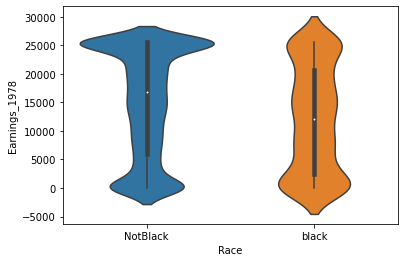

In [16]:
sns.violinplot(x=LabourData["Race"],y=LabourData["Earnings_1978"])

<AxesSubplot:xlabel='Hisp', ylabel='Earnings_1978'>

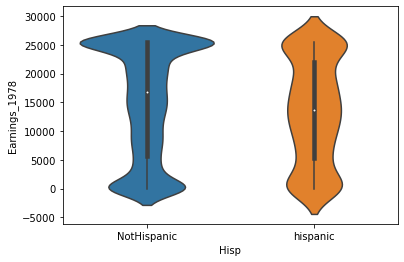

In [17]:
sns.violinplot(x=LabourData["Hisp"],y=LabourData["Earnings_1978"])

##### Note: NotHispanic peoples earning are more at the higher end and there is not a huge variance in Hispanic peoples, 

<AxesSubplot:xlabel='Hisp', ylabel='Earnings_1978'>

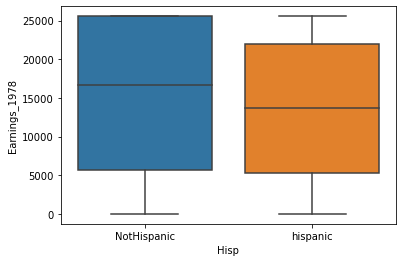

In [18]:
sns.boxplot(x=LabourData["Hisp"],y=LabourData["Earnings_1978"])

<AxesSubplot:xlabel='MaritalStatus', ylabel='Earnings_1978'>

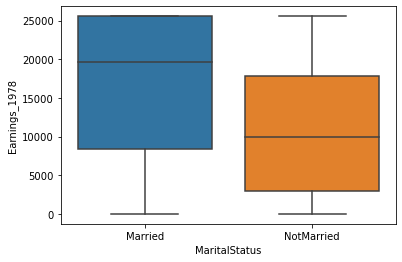

In [19]:
sns.boxplot(x=LabourData["MaritalStatus"],y=LabourData["Earnings_1978"])

##### Note; Median Earning for Married Labours is higher than Unmarried Labours

<AxesSubplot:xlabel='Eduacation', ylabel='Earnings_1978'>

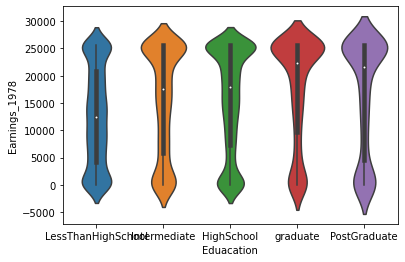

In [20]:
sns.violinplot(x=LabourData["Eduacation"],y=LabourData["Earnings_1978"])

<AxesSubplot:xlabel='Eduacation', ylabel='Earnings_1978'>

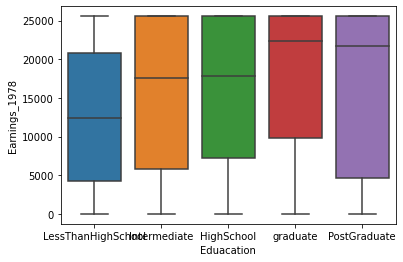

In [21]:
sns.boxplot(x=LabourData["Eduacation"],y=LabourData["Earnings_1978"])

### Seperate the Numerical and Categorical Variables

Numerical Variables

In [22]:
LabourData_num=LabourData[['Age','Nodeg','Earnings_1974','Earnings_1975','Earnings_1978']]

Categorical Variables : The Variables which are having category should be converted to dummy variables 

The linear regression will only accept numbers so we will make dummy variables

### Creation of dummy Variables

In [23]:
LabourData_dummies=pd.get_dummies(LabourData[['Race','Hisp','MaritalStatus','Eduacation']])

In [24]:
LabourData_dummies.head()

Race_NotBlack  Race_black  Hisp_NotHispanic  Hisp_hispanic  \
0              1           0                 1              0   
1              1           0                 1              0   
2              1           0                 1              0   
3              1           0                 1              0   
4              1           0                 1              0   

   MaritalStatus_Married  MaritalStatus_NotMarried  Eduacation_HighSchool  \
0                      1                         0                      0   
1                      0                         1                      0   
2                      1                         0                      1   
3                      1                         0                      0   
4                      1                         0                      0   

   Eduacation_Intermediate  Eduacation_LessThanHighSchool  \
0                        0                              1   
1                        1                              0   
2                        0                              0   
3                        0                              1   
4                        0                              1   

   Eduacation_PostGraduate  Eduacation_graduate  
0                        0                    0  
1                        0                    0  
2                        0                    0  
3                        0                    0  
4                        0                    0

### Combine Numerical and Dummy Variables

In [25]:
LabourData_combined=pd.concat([LabourData_num,LabourData_dummies],axis=1)

In [26]:
LabourData_combined.head()

Age  Nodeg  Earnings_1974  Earnings_1975  Earnings_1978  Race_NotBlack  \
0   45      1      21516.670      25243.550      25564.670              1   
1   21      0       3175.971       5852.565      13496.080              1   
2   38      0      23039.020      25130.760      25564.670              1   
3   48      1      24994.370      25243.550      25564.670              1   
4   18      1       1669.295      10727.610       9860.869              1   

   Race_black  Hisp_NotHispanic  Hisp_hispanic  MaritalStatus_Married  \
0           0                 1              0                      1   
1           0                 1              0                      0   
2           0                 1              0                      1   
3           0                 1              0                      1   
4           0                 1              0                      1   

   MaritalStatus_NotMarried  Eduacation_HighSchool  Eduacation_Intermediate  \
0                         0                      0                        0   
1                         1                      0                        1   
2                         0                      1                        0   
3                         0                      0                        0   
4                         0                      0                        0   

   Eduacation_LessThanHighSchool  Eduacation_PostGraduate  Eduacation_graduate  
0                              1                        0                    0  
1                              0                        0                    0  
2                              0                        0                    0  
3                              1                        0                    0  
4                              1                        0                    0

In [51]:
LabourData_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            15992 non-null  int64  
 1   Nodeg                          15992 non-null  int64  
 2   Earnings_1974                  15992 non-null  float64
 3   Earnings_1975                  15992 non-null  float64
 4   Earnings_1978                  15992 non-null  float64
 5   Race_NotBlack                  15992 non-null  uint8  
 6   Race_black                     15992 non-null  uint8  
 7   Hisp_NotHispanic               15992 non-null  uint8  
 8   Hisp_hispanic                  15992 non-null  uint8  
 9   MaritalStatus_Married          15992 non-null  uint8  
 10  MaritalStatus_NotMarried       15992 non-null  uint8  
 11  Eduacation_HighSchool          15992 non-null  uint8  
 12  Eduacation_Intermediate        15992 non-null 

## Step 3: Splitting the data in Training and Test set

Using Skelearn we split 70% of our dat into training set and rest in test set

Setting random_state will give the same training and test set everytime on running the code

In [28]:
# To know all the columns in the dataset.
LabourData_combined.columns

Index(['Age', 'Nodeg', 'Earnings_1974', 'Earnings_1975', 'Earnings_1978',
       'Race_NotBlack', 'Race_black', 'Hisp_NotHispanic', 'Hisp_hispanic',
       'MaritalStatus_Married', 'MaritalStatus_NotMarried',
       'Eduacation_HighSchool', 'Eduacation_Intermediate',
       'Eduacation_LessThanHighSchool', 'Eduacation_PostGraduate',
       'Eduacation_graduate'],
      dtype='object')

##### Note : Nodeg and Earnings_1978 has been removed from the column list as they are dependent variable and rest are independent variable. 

In [29]:
# Putting feature variable to x
x=LabourData_combined[['Age', 'Earnings_1974', 'Earnings_1975',
       'Race_NotBlack', 'Race_black', 'Hisp_NotHispanic', 'Hisp_hispanic',
       'MaritalStatus_Married', 'MaritalStatus_NotMarried',
       'Eduacation_HighSchool', 'Eduacation_Intermediate',
       'Eduacation_LessThanHighSchool', 'Eduacation_PostGraduate',
       'Eduacation_graduate']]
# Putting response variable to y
y=LabourData['Earnings_1978']

In [30]:
# Random_state is the seed used by the random number generator.it can be any integer.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

## Step 4: Performing Linear Regression

##### How to Use the Regression Equation
Once you have the regression equation, using it is a snap. Choose a value for the independent variable (x), perform the computation, and you have an estimated value (ŷ) for the dependent variable.

In our example, the independent variable is the student's score on the aptitude test. The dependent variable is the student's statistics grade. If a student made an 80 on the aptitude test, the estimated statistics grade (ŷ) would be:

    ŷ = b0 + b1x

    ŷ = 26.768 + 0.644x = 26.768 + 0.644 * 80

    ŷ = 26.768 + 51.52 = 78.288

<font color='red'>Warning</font>: When you use a regression equation, do not use values for the independent variable that are outside the range of values used to create the equation. That is called extrapolation, and it can produce unreasonable estimates.

In this example, the aptitude test scores used to create the regression equation ranged from 60 to 95. Therefore, only use values inside that range to estimate statistics grades. Using values outside that range (less than 60 or greater than 95) is problematic.

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
# Representing LinearRegression as Lr(Creating linear Regression Object)
lm=LinearRegression()

In [33]:
# fit the model to the tarining data
lm.fit(x_train,y_train)

LinearRegression()

## Step 5: Model Evalution

In [34]:
# print the intercept
print(lm.intercept_)

7444.554159632259


In [35]:
# Let's see the coefficient
coeff_df=pd.DataFrame(lm.coef_,x_test.columns,columns=['Coefficient'])
coeff_df

Coefficient
Age                            -105.198175
Earnings_1974                     0.287449
Earnings_1975                     0.477042
Race_NotBlack                   455.276440
Race_black                     -455.276440
Hisp_NotHispanic                318.966611
Hisp_hispanic                  -318.966611
MaritalStatus_Married            -6.798382
MaritalStatus_NotMarried          6.798382
Eduacation_HighSchool          -348.648766
Eduacation_Intermediate        -212.161446
Eduacation_LessThanHighSchool  -525.158971
Eduacation_PostGraduate         649.237226
Eduacation_graduate             436.731957

From the above results we may intern that if age increases by 1 unit

it will affect Earnings_1978 by -105.198175 units

Here, we can clearly see that race_blacknotblack is earning 455.27 more while Race_black is earning -455.27

## Step 6: Prediction 

In [36]:
# Making Prediction using the model
y_pred=lm.predict(x_test)


## Step 7: Model Performance Metrices

### <font color='red'>Coefficient of Dtermination (R square)</font>

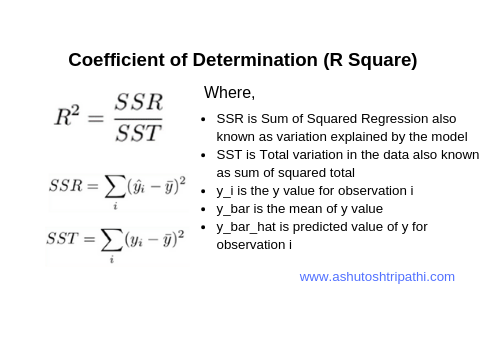

##### How to Find the Coefficient of Determination
Whenever you use a regression equation, you should ask how well the equation fits the data. One way to assess fit is to check the coefficient of determination, which can be computed from the following formula.

    R2 = { ( 1 / N ) * Σ [ (xi - x) * (yi - y) ] / (σx * σy ) }2

where N is the number of observations used to fit the model, Σ is the summation symbol, xi is the x value for observation i, x is the mean x value, yi is the y value for observation i, y is the mean y value, σx is the standard deviation of x, and σy is the standard deviation of y.

Computations for the sample problem of this lesson are shown below. We begin by computing the standard deviation of x (σx):

    σx = sqrt [ Σ ( xi - x )2 / N ]

    σx = sqrt( 730/5 ) = sqrt(146) = 12.083

Next, we find the standard deviation of y, (σy):

    σy = sqrt [ Σ ( yi - y )2 / N ]

    σy = sqrt( 630/5 ) = sqrt(126) = 11.225

And finally, we compute the coefficient of determination (R2):
    
    R2 = { ( 1 / N ) * Σ [ (xi - x) * (yi - y) ] / (σx * σy ) }2

    R2 = [ ( 1/5 ) * 470 / ( 12.083 * 11.225 ) ]2

    R2 = ( 94 / 135.632 )2 = ( 0.693 )2 = 0.48

A coefficient of determination equal to 0.48 indicates that about 48% of the variation in statistics grades (the dependent variable) can be explained by the relationship to math aptitude scores (the independent variable). This would be considered a good fit to the data, in the sense that it would substantially improve an educator's ability to predict student performance in statistics class.

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r_sqaured = r2_score(y_test, y_pred)

In [38]:
from math import sqrt
rmse=sqrt(mse)

In [39]:
print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)
print('r_sqaure_value:',r_sqaured)

Mean_Squared_Error: 50283398.7266498
Root_Mean_Sqaured_Erro: 7091.078812610236
r_sqaure_value: 0.4639289087064391


If the vlaue of R2 is 0.463 then this suggests that 46.3% of the variation in Y can be explained with the help of given explanatory variables in that model.In other Words,It explains the propostion of variation in the dependent variable that is explained by the independent variables.

On addition of a new variable the error is sure to decrease, thus R square always increases whenever a new variable is added to our model.This may not describe the importance of a varibale

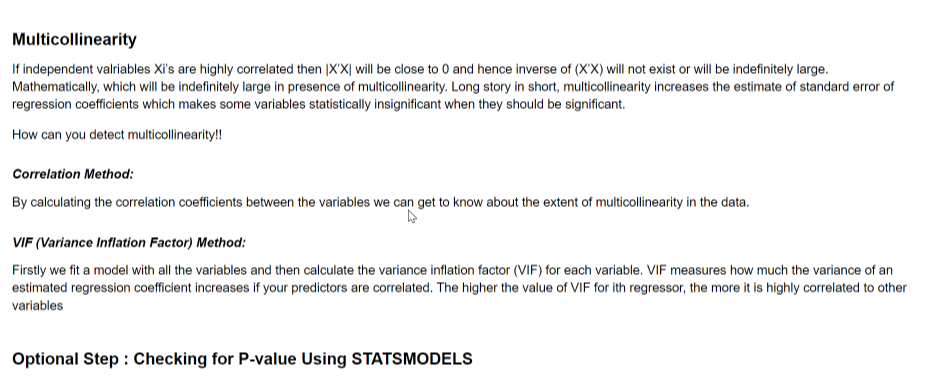

### <font color='Red'>Optional step : Checking for P-Value using STATSMODELS</font>

In [40]:
import statsmodels.api as sm

In [41]:
x_train_sm=x_train
# Unlike SKLearn, statsmodels don't automatically fit a constant,
# So you need to use method sm.add_constant(x) in order to add a constant.
x_train_sm=sm.add_constant(x_train_sm)
# Create  a fitted model in one line.
lm_1=sm.OLS(y_train,x_train_sm).fit()

# Print the coefficients
lm_1.params

const                            2757.242281
Age                              -105.198175
Earnings_1974                       0.287449
Earnings_1975                       0.477042
Race_NotBlack                    1833.897580
Race_black                        923.344701
Hisp_NotHispanic                 1697.587751
Hisp_hispanic                    1059.654530
MaritalStatus_Married            1371.822759
MaritalStatus_NotMarried         1385.419523
Eduacation_HighSchool             202.799690
Eduacation_Intermediate           339.287010
Eduacation_LessThanHighSchool      26.289486
Eduacation_PostGraduate          1200.685682
Eduacation_graduate               988.180413
dtype: float64

In [42]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:          Earnings_1978   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1031.
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:02:52   Log-Likelihood:            -1.1490e+05
No. Observations:               11194   AIC:                         2.298e+05
Df Residuals:                   11183   BIC:                         2.299e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

F-Statistics are the OLS models being built significantly diff. from each other (higher the better)

Prob(F-Statistics): P-Value for the F-statistics estimate ,indicates wheather the f-statistics is statistically significant.

Log-Likelihood: Is coverge close, Closer the value to 0 indicates that the conversion point is near. 

AIC & BIC :Model goodness of fit V/S complexity. if the value is low, indicates that OLS model is close to the true model(best fit)

Skewness : Measure of the symmetry of residuals around the mean.

Kurtosis : Measure of shape of the distribution of residuals. compares residuals that are closer to residuals that are far away from mean.

Omnibus: Combines kurtosis & Skewness & provides an estimates which is statistical in nature.

Jarque Bera :Different test for skewness & kurtosis of residuals.

Durbin Watson : A test for the presenceof autocprrelation & residuals.Important for time series.

<AxesSubplot:>

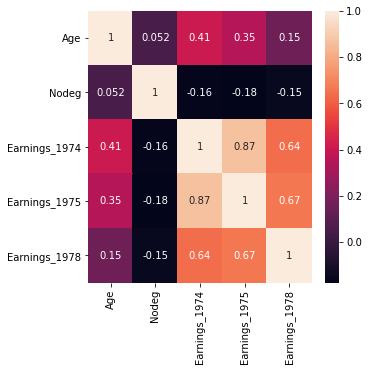

In [43]:
plt.figure(figsize= (5,5))
sns.heatmap(LabourData_num.corr(),annot=True)

## Step 8: Implementing the results

From the Data above, You can conclude that Newspaper is isignificant

Text(0, 0.5, 'Earnings_1978')

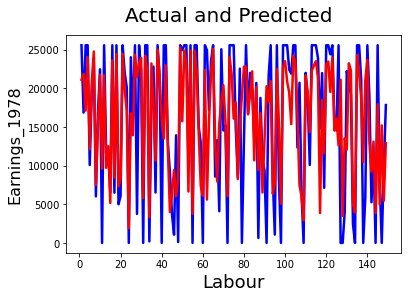

In [44]:
# Actual vs Predicted
# Check For the first 150 Observations

c=[i  for i in range(1,150,1)]
fig=plt.figure()
plt.plot(c,y_test[1:150],color="blue",linewidth=2.5,linestyle="-")
plt.plot(c,y_pred[1:150],color="red",linewidth=2.5,linestyle="-")
fig.suptitle('Actual and Predicted',fontsize=20)        #plot Heading
plt.xlabel('Labour',fontsize=18)                       #x-label
plt.ylabel('Earnings_1978',fontsize=16)                #y-Label

Text(0, 0.5, 'Actual-Predicted')

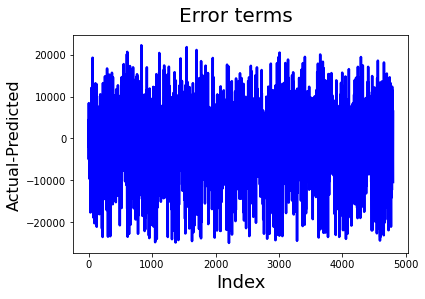

In [45]:
# Error terms

c=[i  for i in range(1,4799,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color="blue",linewidth=2.5,linestyle="-")
fig.suptitle('Error terms',fontsize=20)        #plot Heading
plt.xlabel('Index',fontsize=18)                       #x-label
plt.ylabel('Actual-Predicted',fontsize=16)                #y-Label

In [46]:
print('Mean_Squared_Error:',mse)
print('r_square_value:',r_sqaured)

Mean_Squared_Error: 50283398.7266498
r_square_value: 0.4639289087064391


In [47]:
x_train_final=x_train
"""Unlike Sklearn,Statemosels don't automatically fit a constant,so you need to use the method sm.odd_constant(x) in order to 
add a constatnt or intercept"""
x_train_final=sm.add_constant(x_train_final)
#Create a fitted model in one line
lm_final=sm.OLS(y_train,x_train_final).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:          Earnings_1978   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1031.
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:02:52   Log-Likelihood:            -1.1490e+05
No. Observations:               11194   AIC:                         2.298e+05
Df Residuals:                   11183   BIC:                         2.299e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Varinace Inflation Factor

Variance Inflation factor(VIF) for an explanatory variable is given 1/(1-R^2).

Here, we take that particular X as response variable and all other explanatory Variables as independent variables.

so, we run a regression between one of those explanatory variables with remaining explanatory variables.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
# For each X, Calculate VIF and save in dataframe
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"]=x.columns

C:\Users\sasai\anaconda3.32\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [50]:
vif.round(2)

VIF Factor                       features
0         1.37                            Age
1         4.41                  Earnings_1974
2         4.18                  Earnings_1975
3          inf                  Race_NotBlack
4          inf                     Race_black
5          inf               Hisp_NotHispanic
6          inf                  Hisp_hispanic
7          inf          MaritalStatus_Married
8          inf       MaritalStatus_NotMarried
9          inf          Eduacation_HighSchool
10         inf        Eduacation_Intermediate
11         inf  Eduacation_LessThanHighSchool
12         inf        Eduacation_PostGraduate
13         inf            Eduacation_graduate

## Step 9: Model Improvement

<font color='red'>Go to the Python basic to advance at the distribution plot digramm</font>

Polynomial Transformation 